## 计数变量回归

####  黄荣贵（复旦大学社会学系）

In [1]:
library(foreign)
couart <- read.dta("datasets/couart2.dta")
head(couart)

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
6,0,Women,Married,2,3.59,2


In [2]:
m1 <- glm(art ~ fem + ment, data=couart, family=poisson)
summary(m1)


Call:
glm(formula = art ~ fem + ment, family = poisson, data = couart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6094  -1.5746  -0.3891   0.5651   5.7868  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.34909    0.04191   8.329  < 2e-16 ***
femWomen    -0.18445    0.05235  -3.523 0.000426 ***
ment         0.02510    0.00193  13.005  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1817.4  on 914  degrees of freedom
Residual deviance: 1657.0  on 912  degrees of freedom
AIC: 3330.7

Number of Fisher Scoring iterations: 5


In [3]:
exp(coef(m1))

(Intercept)    femWomen        ment 
  1.4177815   0.8315604   1.0254201

In [4]:
couart$predArt = predict(m1, type="response")
head(couart)

,art,fem,mar,kid5,phd,ment,predArt
1,0,Men,Married,0,2.52,7,1.690137
2,0,Women,Single,0,2.05,6,1.37061
3,0,Women,Single,0,3.75,6,1.37061
4,0,Men,Married,1,1.18,3,1.528674
5,0,Women,Single,0,3.75,26,2.264385
6,0,Women,Married,2,3.59,2,1.239672


### 评估模型拟合度

In [5]:
(meanPred = sapply(0:9, function(m) mean(dpois(m, couart$predArt))))

[1] 0.2052027736 0.3114204906 0.2456201777 0.1359469614 0.0606643402
 [6] 0.0240924497 0.0093238329 0.0038190407 0.0017442222 0.0008943331

In [6]:
(obsPred = prop.table(table(couart$art)))


          0           1           2           3           4           5 
0.300546448 0.268852459 0.194535519 0.091803279 0.073224044 0.029508197 
          6           7           8           9          10          11 
0.018579235 0.013114754 0.001092896 0.002185792 0.001092896 0.001092896 
         12          16          19 
0.002185792 0.001092896 0.001092896 

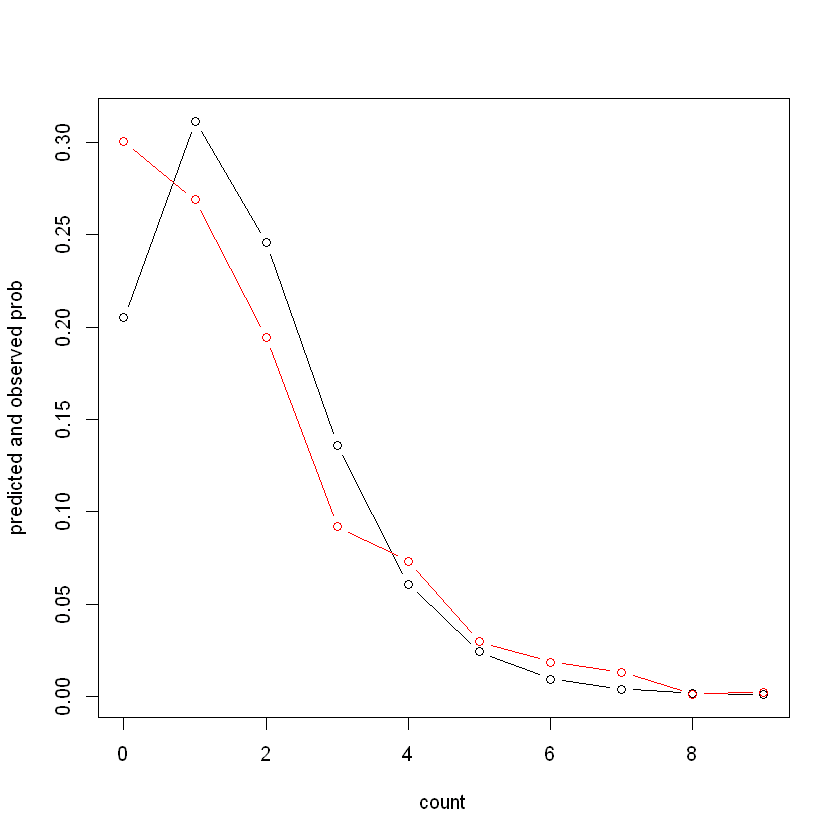

In [7]:
plot(0:9, meanPred, type="b", xlab="count", 
     ylab="predicted and observed prob")
lines(0:9, obsPred[1:10], col="red", type="b")

### 负二项回归

In [17]:
library(MASS)
mod_nb <- glm.nb(art ~  fem + mar + kid5 + phd + ment, data=couart)
summary(mod_nb)


Call:
glm.nb(formula = art ~ fem + mar + kid5 + phd + ment, data = couart, 
    init.theta = 2.264387695, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1678  -1.3617  -0.2806   0.4476   3.4524  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.256144   0.137348   1.865 0.062191 .  
femWomen    -0.216418   0.072636  -2.979 0.002887 ** 
marMarried   0.150489   0.082097   1.833 0.066791 .  
kid5        -0.176415   0.052813  -3.340 0.000837 ***
phd          0.015271   0.035873   0.426 0.670326    
ment         0.029082   0.003214   9.048  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2.2644) family taken to be 1)

    Null deviance: 1109.0  on 914  degrees of freedom
Residual deviance: 1004.3  on 909  degrees of freedom
AIC: 3135.9

Number of Fisher Scoring iterations: 1


              Theta:  2.264 
          Std. Err.:  0.271 

 2 x log-l

### 零膨胀回归

默认情况下是零膨胀泊松回归。具体而言，零膨胀部分使用logit回归，而计数部分使用泊松回归。

In [9]:
library(pscl)
#vignette("countreg", package="pscl")

Loading required package: lattice
Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University

Simon Jackman

hurdle and zeroinfl functions by Achim Zeileis



In [10]:
zip = zeroinfl(art ~ fem + mar + kid5 + phd + ment | fem + mar + kid5 + phd + ment, data = couart)
summary(zip)


Call:
zeroinfl(formula = art ~ . | ., data = couart)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.8173 -0.8819 -0.2591  0.5284  6.9125 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.203359   0.208196   5.780 7.47e-09 ***
femWomen    -0.363094   0.078583  -4.621 3.83e-06 ***
marMarried   0.104411   0.071829   1.454  0.14606    
kid5        -0.134737   0.047646  -2.828  0.00469 ** 
phd         -0.035897   0.032710  -1.097  0.27246    
ment         0.046883   0.008761   5.351 8.72e-08 ***
predArt     -0.397228   0.121841  -3.260  0.00111 ** 

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.96169    1.23583  -1.587   0.1124  
femWomen     0.26712    0.37290   0.716   0.4738  
marMarried  -0.35573    0.32878  -1.082   0.2793  
kid5         0.22545    0.19718   1.143   0.2529  
phd         -0.07593    0.14889  -0.510   0

模型预测值：

In [11]:
couart$predY = predict(zip)

预测计数成分的均值（已剔除0成分）

In [12]:
couart$predCount = predict(zip, type="count")

预测观察到零成分的概率。

In [13]:
couart$predZ = predict(zip, type="zero")

In [14]:
head(couart)

,art,fem,mar,kid5,phd,ment,predArt,predY,predCount,predZ
1,0,Men,Married,0,2.52,7,1.690137,2.038315,2.396763,0.1495548
2,0,Women,Single,0,2.05,6,1.37061,1.291108,1.654548,0.2196614
3,0,Women,Single,0,3.75,6,1.37061,1.247867,1.5566,0.1983379
4,0,Men,Married,1,1.18,3,1.528674,1.438347,1.942724,0.2596237
5,0,Women,Single,0,3.75,26,2.264385,2.670146,2.787435,0.04207769
6,0,Women,Married,2,3.59,2,1.239672,0.8231087,1.159126,0.2898886


观察到该取值的概率

In [15]:
predP = predict(zip, type="prob")
head(predP)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,2.269556e-01,1.855114e-01,2.223134e-01,1.776108e-01,1.064227e-01,5.101401e-02,2.037808e-02,6.977346e-03,2.090380e-03,5.566828e-04,1.334237e-04,2.907135e-05,5.806427e-06,1.070510e-06,1.832684e-07,2.928340e-08,4.386584e-09,6.184472e-10,8.234840e-11,1.038787e-11
2,3.688453e-01,2.468320e-01,2.041977e-01,1.126183e-01,4.658308e-02,1.541479e-02,4.250750e-03,1.004724e-03,2.077955e-04,3.820085e-05,6.320514e-06,9.506903e-07,1.310802e-07,1.668296e-08,1.971625e-09,2.174766e-10,2.248909e-11,2.188781e-12,2.011912e-13,1.752003e-14
3,3.673698e-01,2.631150e-01,2.047824e-01,1.062547e-01,4.134901e-02,1.287277e-02,3.339625e-03,7.426370e-04,1.444986e-04,2.499182e-05,3.890226e-06,5.505022e-07,7.140929e-08,8.550436e-09,9.506861e-10,9.865584e-11,9.597977e-12,8.788357e-13,7.599974e-14,6.226377e-15
4,3.657293e-01,2.061338e-01,2.002306e-01,1.296643e-01,6.297548e-02,2.446880e-02,7.922688e-03,2.198800e-03,5.339577e-04,1.152592e-04,2.239168e-05,3.954624e-06,6.402287e-07,9.567598e-08,1.327657e-08,1.719515e-09,2.087840e-10,2.385939e-11,2.575123e-12,2.633029e-13
5,1.010656e-01,1.644249e-01,2.291618e-01,2.129245e-01,1.483783e-01,8.271896e-02,3.842895e-02,1.530260e-02,5.331874e-03,1.651361e-03,4.603062e-04,1.166430e-04,2.709457e-05,5.809565e-06,1.156699e-06,2.149482e-07,3.744713e-08,6.140083e-09,9.508379e-10,1.394947e-10
6,5.126933e-01,2.582588e-01,1.496773e-01,5.783161e-02,1.675854e-02,3.885052e-03,7.505442e-04,1.242822e-04,1.800735e-05,2.319199e-06,2.688244e-07,2.832740e-08,2.736253e-09,2.439741e-10,2.019977e-11,1.560939e-12,1.130828e-13,7.710427e-15,4.965199e-16,3.029101e-17


#### 将dist参数设置为"negbin"则可以得到零膨胀负二项回归。

In [16]:
zinb = zeroinfl(art ~ fem + mar + kid5 + phd + ment | fem + mar + kid5 + phd + ment, data = couart, dist="negbin")
summary(zinb)


Call:
zeroinfl(formula = art ~ fem + mar + kid5 + phd + ment | fem + mar + 
    kid5 + phd + ment, data = couart, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2942 -0.7601 -0.2909  0.4448  6.4155 

Count model coefficients (negbin with log link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4167465  0.1435966   2.902  0.00371 ** 
femWomen    -0.1955068  0.0755926  -2.586  0.00970 ** 
marMarried   0.0975826  0.0844520   1.155  0.24789    
kid5        -0.1517325  0.0542061  -2.799  0.00512 ** 
phd         -0.0007001  0.0362697  -0.019  0.98460    
ment         0.0247862  0.0034927   7.097 1.28e-12 ***
Log(theta)   0.9763565  0.1354695   7.207 5.71e-13 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.19169    1.32282  -0.145  0.88478   
femWomen     0.63593    0.84892   0.749  0.45379   
marMarried  -1.49947    0.93867  -1.597  0.11017   
kid5 